In [18]:
import os
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from tqdm import tqdm

In [ ]:
def extract_sentences(input_dir, output_file):
    """
    Traverse the directory, read all .txt files, and write their content into a single .txt file.

    Args:
    - input_dir: Root directory containing the year folders.
    - output_file: Path to the output file where sentences will be saved.
    """
    with open(output_file, 'w', encoding='utf-8') as outfile:
        for root, dirs, files in os.walk(input_dir):
            for file in files:
                if file.endswith('.cms.txt'):
                    file_path = os.path.join(root, file)
                    try:
                        with open(file_path, 'r', encoding='utf-8') as infile:
                            content = infile.read()
                            outfile.write(content + '\n')
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")

input_directory = 'Downloads/MarathiData'
output_filepath = 'Downloads/MarathiData/output.txt'

extract_sentences(input_directory, output_filepath)

In [ ]:
def clean_tags(input_file, output_file):
    """
    Remove specified tags from the input file and write the cleaned content to the output file.

    Args:
    - input_file: Path to the input file.
    - output_file: Path to the output file.
    """
    with open(input_file, 'r', encoding='utf-8') as infile, open(output_file, 'w', encoding='utf-8') as outfile:
        for line in infile:
            # Remove the specified tags
            line = re.sub(r'</?(doc|text)>', '', line)  # Remove <doc>, </doc>, <text>, </text>
            line = re.sub(r'<docno>.*?</docno>', '', line)  # Remove <docno>...</docno>
            # Write the cleaned line if it's not empty after stripping
            if line.strip():
                outfile.write(line)

input_filepath = "Downloads/MarathiData/output.txt"
output_filepath = "Downloads/MarathiData/output_no_tags.txt"

clean_tags(input_filepath, output_filepath)

In [ ]:
def clean_and_convert_to_single_line(input_file, output_file):
    """
    Remove all datetime strings and convert the document to a single line.

    Args:
    - input_file: Path to the input file.
    - output_file: Path to the output file.
    """
    # Regular expression for matching datetime strings
    datetime_pattern = r'\[\s*[A-Za-z]+,\s+[A-Za-z]+\s+\d{1,2},\s+\d{4}\s+\d{2}:\d{2}:\d{2}\s+[apAP][mM]\s*\]'

    with open(input_file, 'r', encoding='utf-8') as infile:
        content = infile.read()
        # Remove datetime strings
        content = re.sub(datetime_pattern, '', content)
        # Convert to single line by replacing newlines with a space
        single_line_content = ' '.join(content.split())

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write(single_line_content)

input_filepath = "Downloads/MarathiData/output_no_tags.txt"
output_filepath = "Downloads/MarathiData/output_cleaned.txt"

clean_and_convert_to_single_line(input_filepath, output_filepath)

In [ ]:
def remove_punctuation_and_normalize(input_file, output_file):
    """
    Remove all punctuation (including Marathi punctuation) and normalize the text
    such that each word is followed by a single space.

    Args:
    - input_file: Path to the input file.
    - output_file: Path to the output file.
    """
    # Regular expression for matching punctuation (including Marathi punctuation)
    punctuation_pattern = r'[।!?.,:;\'"()\[\]{}॥]+'

    with open(input_file, 'r', encoding='utf-8') as infile:
        content = infile.read()
        # Remove punctuation
        content = re.sub(punctuation_pattern, '', content)
        # Normalize spaces
        normalized_content = ' '.join(content.split())

    with open(output_file, 'w', encoding='utf-8') as outfile:
        outfile.write(normalized_content)

input_filepath = "Downloads/MarathiData/output_cleaned.txt"
output_filepath = "Downloads/MarathiData/marathi_dataset.txt"

remove_punctuation_and_normalize(input_filepath, output_filepath)

In [1]:
!python3 --version

Python 3.10.12


In [1]:
!pip install nltk tqdm

In [2]:
import os
import numpy as np
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from tqdm import tqdm

In [6]:
def load_data(file_path):
    """
    Load data from a file, handling potential encoding errors,
    with special consideration for Marathi text.

    Args:
    - file_path: Path to the file.

    Returns:
    - A list of words in the file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            return file.read().split()
    except UnicodeDecodeError:
        # If UTF-8 fails, try other potential encodings
        try:
            with open(file_path, 'r', encoding='iso-8859-1') as file:
                return file.read().split()
        except UnicodeDecodeError:
            # If all else fails, use 'replace' as a fallback
            with open(file_path, 'r', encoding='utf-8', errors='replace') as file:
                print("WARNING: Encoding issues detected. Some characters might be replaced.")
                return file.read().split()

english_words = load_data("/kaggle/input/zipfs-law-on-different-languages/english_dataset.txt")
hindi_words = load_data("/kaggle/input/zipfs-law-on-different-languages/hindi_dataset.txt")
marathi_words = load_data("/kaggle/input/zipfs-law-on-different-languages/marathi_dataset.txt")

In [7]:
english_words[1000]

'together'

In [8]:
hindi_words[1000]

'एक'

In [9]:
marathi_words[1000]

'निवडणूक'

In [10]:
english_porter_stemmer = PorterStemmer()

In [11]:
def hindi_porter_stemmer(word):
    suffixes = {
        1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
        2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
        3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
        4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
        5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
    }
    for L in (5, 4, 3, 2, 1):
        if len(word) > L + 1:
            for suf in suffixes[L]:
                if word.endswith(suf):
                    return word[:-L]
    return word

In [12]:
def marathi_porter_stemmer(word):
    """
    Marathi-specific Porter stemmer to reduce words to their root form by removing suffixes.

    Args:
    - word: The input Marathi word (string).

    Returns:
    - stemmed_word: The root form of the input word (string).
    """
    # Define suffixes for Marathi
    suffixes = {
        1: [u"ा", u"े", u"ी", u"ु", u"ू", u"ो", u"े"],
        2: [u"कर", u"ने", u"नी", u"ना", u"ला", u"ता", u"ते", u"ले", u"वे", u"शी"],
        3: [u"ासाठी", u"ाकर", u"ाने", u"ाया", u"तील", u"तील"],
        4: [u"तांचा", u"तासह", u"बरोबर", u"च्या"],
        5: [u"संपर्कात", u"वाढवलेला"],
    }
    # Iterate over suffixes from longest to shortest
    for L in sorted(suffixes.keys(), reverse=True):
        if len(word) > L + 1:  # Ensure word is long enough
            for suffix in suffixes[L]:
                if word.endswith(suffix):
                    return word[:-L]  # Remove suffix and return root
    return word  # Return original word if no suffix matches

In [13]:
stemmed_english_words = [english_porter_stemmer.stem(word) for word in tqdm(english_words)]
stemmed_hindi_words = [hindi_porter_stemmer(word) for word in tqdm(hindi_words)]
stemmed_marathi_words = [marathi_porter_stemmer(word) for word in tqdm(marathi_words)]

english_rules = """
Porter stemmer rules include:
1. Remove plural suffixes (e.g., 'cats' -> 'cat').
2. Convert past tense (e.g., 'hopping' -> 'hop').
3. Reduce words to base forms (e.g., 'running' -> 'run').
4. Remove derivational suffixes (e.g., 'national' -> 'nation').
5. Simplify endings (e.g., 'happiness' -> 'happy').
"""

hindi_rules = """
Indian Language stemmer rules include:
1. It removes common inflectional suffixes indicating gender, number, tense, and case
2. Reduces different forms of the same word to their base or root form
3. Prevents overly aggressive stemming that might lead to extremely short or meaningless roots
"""

marathi_rules = """
Marathi Porter Stemmer Rules:
1. Remove inflectional suffixes indicating gender, number, tense, and case.
   Examples:
   - Remove short suffixes: "ा", "ी", "े", "ु".
   - Remove common derivational suffixes: "ने", "नी", "ता", "ते".
   - Reduce suffixes for possessive forms or locative forms: "च्या", "तांचा", "तासह".
   - Simplify longer phrases ending with "संपर्कात", "वाढवलेला".
2. Process suffixes in decreasing order of length to avoid premature truncation.
3. Avoid truncating overly short words to meaningless roots.
"""

print("English Stemming Rules:", english_rules)
print("Hindi Stemming Rules:", hindi_rules)
print("Marathi Stemming Rules:", marathi_rules)

100%|██████████| 16938502/16938502 [01:00<00:00, 281925.04it/s]

English Stemming Rules: 
Porter stemmer rules include:
1. Remove plural suffixes (e.g., 'cats' -> 'cat').
2. Convert past tense (e.g., 'hopping' -> 'hop').
3. Reduce words to base forms (e.g., 'running' -> 'run').
4. Remove derivational suffixes (e.g., 'national' -> 'nation').
5. Simplify endings (e.g., 'happiness' -> 'happy').

Hindi Stemming Rules: 
Indian Language stemmer rules include:
1. It removes common inflectional suffixes indicating gender, number, tense, and case
2. Reduces different forms of the same word to their base or root form
3. Prevents overly aggressive stemming that might lead to extremely short or meaningless roots

Marathi Stemming Rules: 
Marathi Porter Stemmer Rules:
1. Remove inflectional suffixes indicating gender, number, tense, and case.
   Examples:
   - Remove short suffixes: "ा", "ी", "े", "ु".
   - Remove common derivational suffixes: "ने", "नी", "ता", "ते".
   - Reduce suffixes for possessive forms or locative forms: "च्या", "तांचा", "तासह".
   - Simpl

In [15]:
def unique_words_stats(words, stemmed_words):
    unique_words = set(words)
    unique_stemmed_words = set(stemmed_words)
    return len(unique_words), len(unique_stemmed_words)

unique_english, unique_stemmed_english = unique_words_stats(english_words, stemmed_english_words)
unique_hindi, unique_stemmed_hindi = unique_words_stats(hindi_words, stemmed_hindi_words)
unique_marathi, unique_stemmed_marathi = unique_words_stats(marathi_words, stemmed_marathi_words)


print("English - Unique Words:", unique_english, "English - Stemmed Words:", unique_stemmed_english)
print("Hindi - Unique Words:", unique_hindi, "Hindi - Stemmed Words:", unique_stemmed_hindi)
print("Marathi - Unique Words:", unique_marathi, "Marathi - Stemmed Words:", unique_stemmed_marathi)

English - Unique Words: 312016 English - Stemmed Words: 248096
Hindi - Unique Words: 321129 Hindi - Stemmed Words: 271604
Marathi - Unique Words: 736845 Marathi - Stemmed Words: 608156


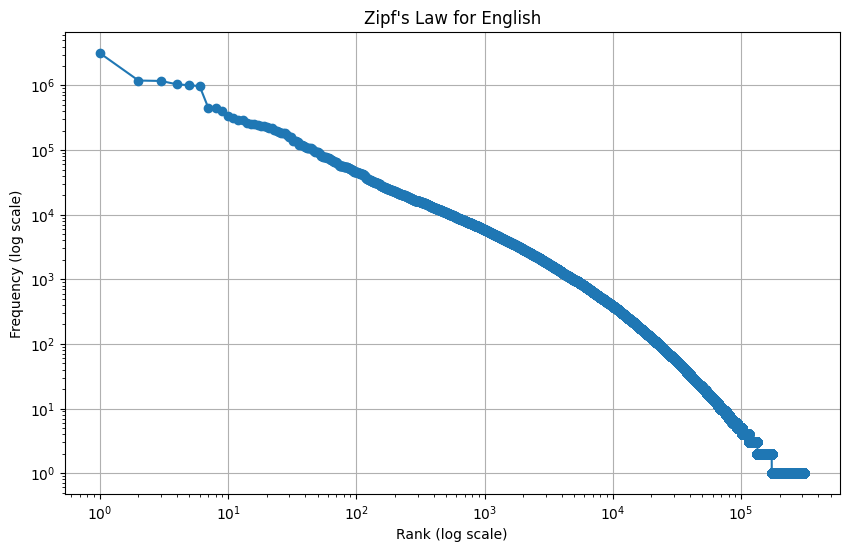

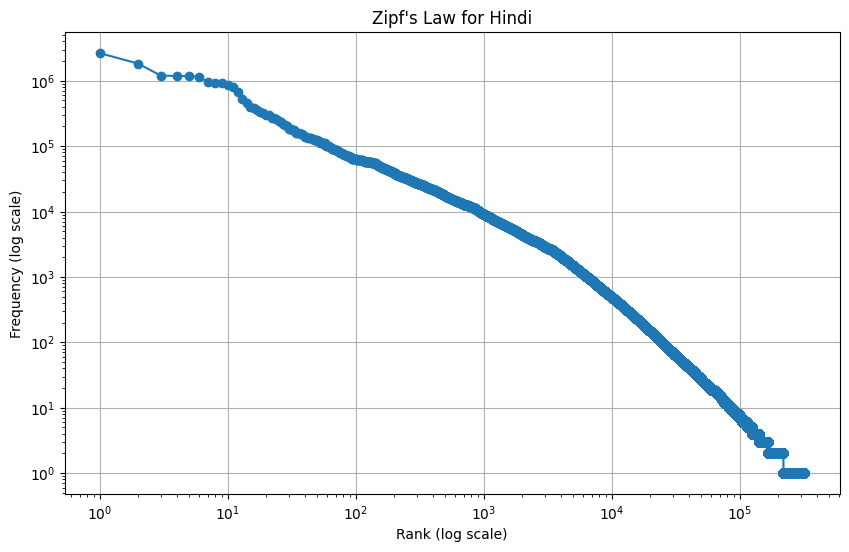

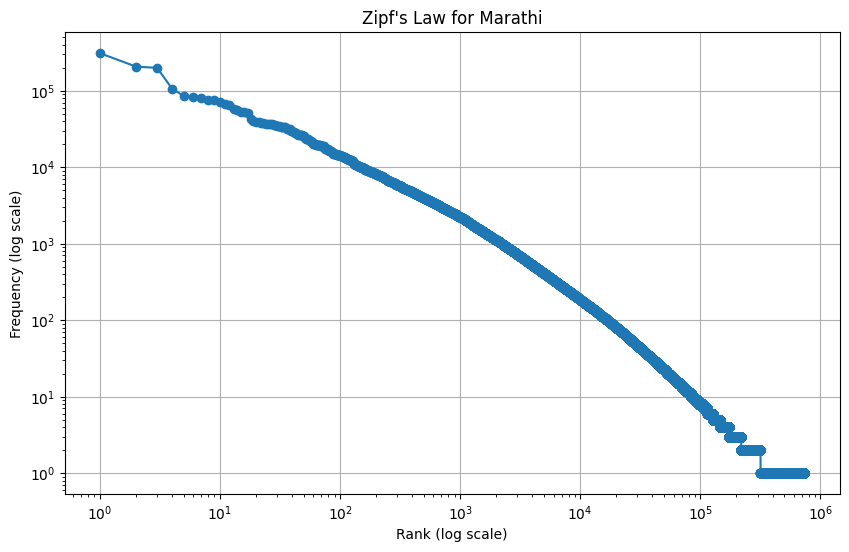

In [16]:
def plot_zipfs_law(words, language_name):
    word_freq = Counter(words)
    sorted_freq = sorted(word_freq.values(), reverse=True)
    ranks = range(1, len(sorted_freq) + 1)

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, sorted_freq, marker="o")
    plt.title(f"Zipf's Law for {language_name}")
    plt.xlabel("Rank (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.grid(True)
    plt.show()

plot_zipfs_law(english_words, "English")
plot_zipfs_law(hindi_words, "Hindi")
plot_zipfs_law(marathi_words, "Marathi")

In [17]:
def check_zipfs_law(words):
    word_freq = Counter(words)
    sorted_freq = np.array(sorted(word_freq.values(), reverse=True))
    ranks = np.arange(1, len(sorted_freq) + 1)
    log_ranks = np.log(ranks)
    log_freq = np.log(sorted_freq)
    correlation = np.corrcoef(log_ranks, log_freq)[0, 1]
    return correlation

english_zipf_corr = check_zipfs_law(english_words)
hindi_zipf_corr = check_zipfs_law(hindi_words)
marathi_zipf_corr = check_zipfs_law(marathi_words)

print("Correlation Coefficient better when near -1")
print("English Zipf's Law Correlation:", english_zipf_corr)
print("Hindi Zipf's Law Correlation:", hindi_zipf_corr)
print("Marathi Zipf's Law Correlation:", marathi_zipf_corr)

Correlation Coefficient better when near -1
English Zipf's Law Correlation: -0.9877255718444451
Hindi Zipf's Law Correlation: -0.9932088550185475
Marathi Zipf's Law Correlation: -0.9804036482913175
